# Análisis de Chile en la IOI

Esto es un análsis de cómo le ha ido a Chile en la Olimpiada Internacional de Informática (IOI). Se va a considerar sólo las estadísticas desde el 2012 ya que es desde el año en que hay datos. Se ocupó la estadística oficial de la IOI https://stats.ioinformatics.org/results/CHL.

In [4]:
# Cargar el archivo CSV y librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('resultados_chile.csv')

# Convertir la columna 'Rank Rel.' en un número porcentual (sin el símbolo de %)
df['Rank Rel.'] = df['Rank Rel.'].str.rstrip('%').astype(float)
# Convertir la columna 'Score Abs.' a tipo numérico (por si acaso hay errores de formato)
df['Score Abs.'] = pd.to_numeric(df['Score Abs.'], errors='coerce')

# Filtrar solo los años desde 2012 en adelante
df_filtered = df[df['Year'] >= 2012]


## Gráficos

### Evolución del promedio de Rank Rel.


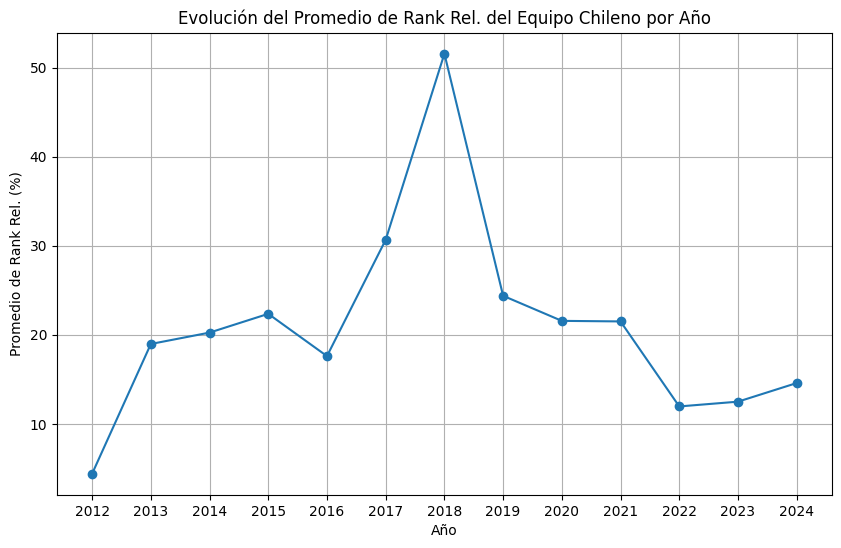

In [3]:
# Calcular el promedio del 'Rank Rel.' por año y graficar
promedio_rank_rel_por_año = df_filtered.groupby('Year')['Rank Rel.'].mean()

# Crear la gráfica de la evolución del Rank Rel. promedio por año
plt.figure(figsize=(10, 6))
plt.plot(promedio_rank_rel_por_año.index, promedio_rank_rel_por_año.values, marker='o', linestyle='-')
plt.title('Evolución del Promedio de Rank Rel. del Equipo Chileno por Año')
plt.xlabel('Año')
plt.ylabel('Promedio de Rank Rel. (%)')
plt.grid(True)
plt.xticks(promedio_rank_rel_por_año.index)  # Mostrar solo los años presentes en el dataset
plt.show()


### Evolución del Puntaje Absoluto Promedio

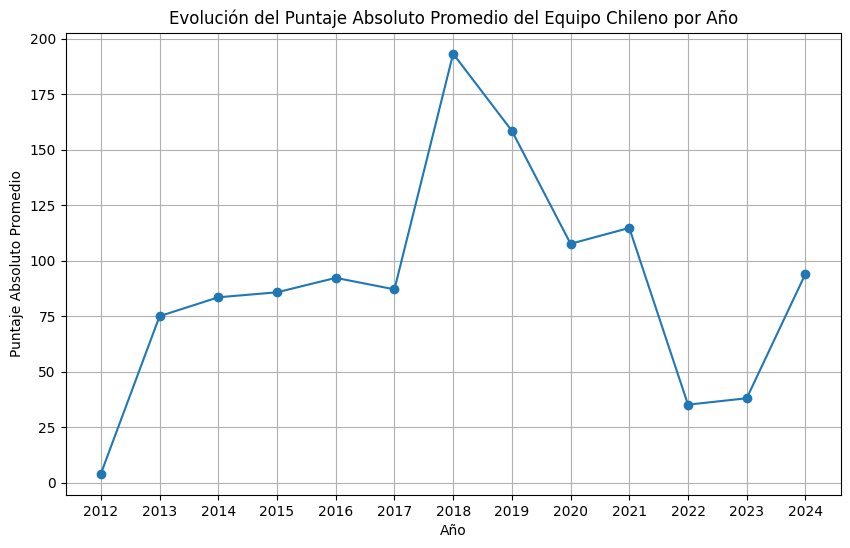

In [6]:
# Calcular el promedio del 'Score Abs.' por año
promedio_score_abs_por_año = df_filtered.groupby('Year')['Score Abs.'].mean()

# Crear la gráfica de la evolución del Score Abs. promedio por año
plt.figure(figsize=(10, 6))
plt.plot(promedio_score_abs_por_año.index, promedio_score_abs_por_año.values, marker='o', linestyle='-')
plt.title('Evolución del Puntaje Absoluto Promedio del Equipo Chileno por Año')
plt.xlabel('Año')
plt.ylabel('Puntaje Absoluto Promedio')
plt.grid(True)
plt.xticks(promedio_score_abs_por_año.index)
plt.show()


### Puntajes Absolutos de los Participantes

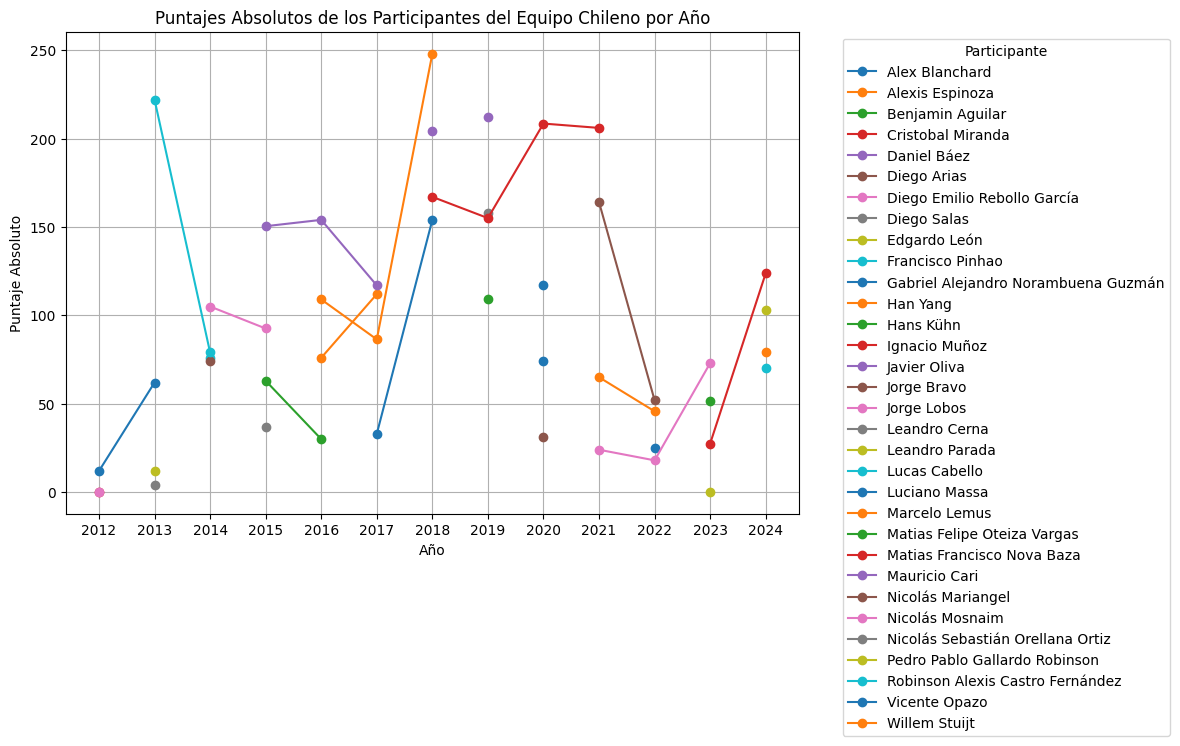

In [9]:
# Crear un DataFrame con el promedio de los puntajes absolutos por participante por año
puntajes_por_participante_por_año = df_filtered.pivot_table(index='Year', columns='Contestant', values='Score Abs.', aggfunc='sum')

# Crear la gráfica de los puntajes absolutos de los cuatro participantes por año
plt.figure(figsize=(12, 7))
for contestant in puntajes_por_participante_por_año.columns:
    plt.plot(puntajes_por_participante_por_año.index, puntajes_por_participante_por_año[contestant], marker='o', linestyle='-', label=contestant)

plt.title('Puntajes Absolutos de los Participantes del Equipo Chileno por Año')
plt.xlabel('Año')
plt.ylabel('Puntaje Absoluto')
plt.grid(True)
plt.xticks(puntajes_por_participante_por_año.index)
plt.legend(title='Participante', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Distribución de Puntajes Absolutos de los Cuatro Participantes

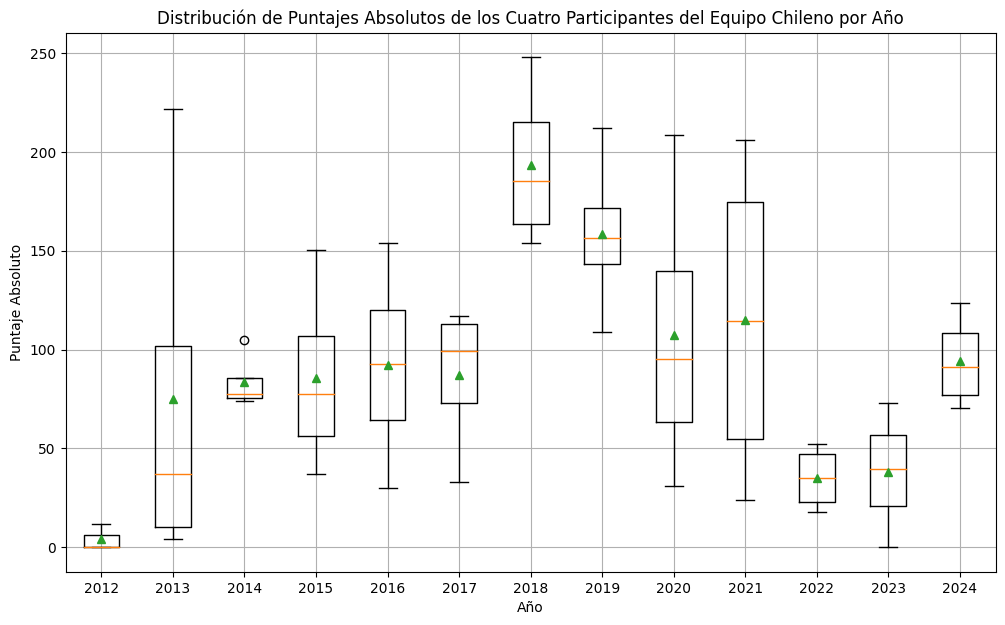

In [10]:
# Agrupar los datos por año y obtener los cuatro puntajes más altos de 'Score Abs.' por año
puntajes_por_año = df_filtered.groupby('Year')['Score Abs.'].apply(lambda x: x.nlargest(4).values)

# Crear la gráfica de caja y bigotes para los puntajes absolutos de los cuatro participantes por año
plt.figure(figsize=(12, 7))
plt.boxplot(puntajes_por_año, labels=puntajes_por_año.index, showmeans=True)

plt.title('Distribución de Puntajes Absolutos de los Cuatro Participantes del Equipo Chileno por Año')
plt.xlabel('Año')
plt.ylabel('Puntaje Absoluto')
plt.grid(True)
plt.show()


### Distribución de las Posiciones Relativas de los Cuatro Participantes

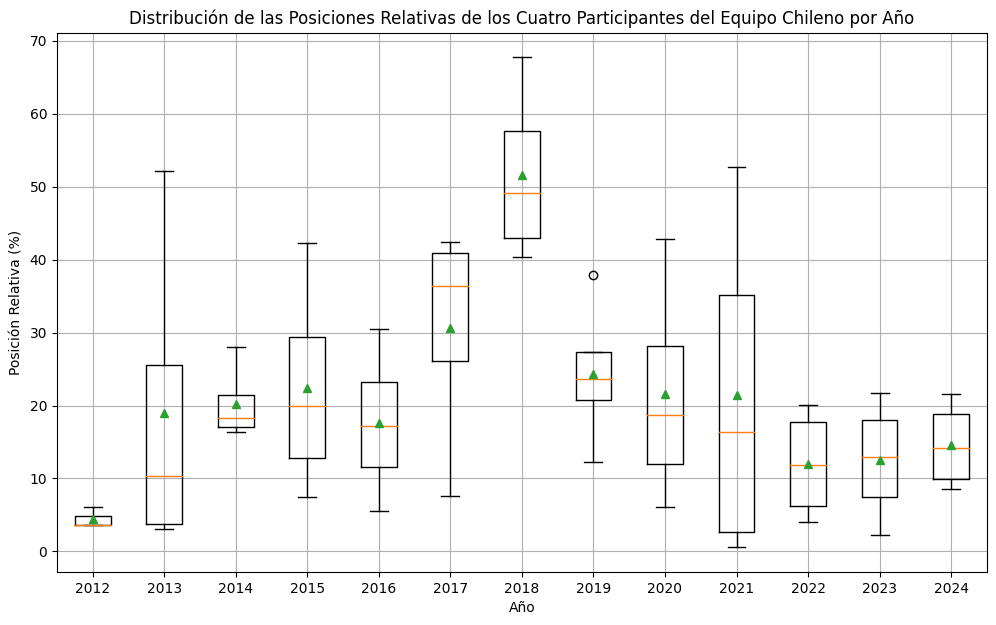

In [11]:
# Celda 6: Crear la gráfica de caja y bigotes para las posiciones relativas de los cuatro participantes por año
# Agrupar los datos por año y obtener las cuatro mejores posiciones relativas de 'Rank Rel.' por año
rank_rel_por_año = df_filtered.groupby('Year')['Rank Rel.'].apply(lambda x: x.nsmallest(4).values)

# Crear la gráfica de caja y bigotes para las posiciones relativas de los cuatro participantes por año
plt.figure(figsize=(12, 7))
plt.boxplot(rank_rel_por_año, labels=rank_rel_por_año.index, showmeans=True)

plt.title('Distribución de las Posiciones Relativas de los Cuatro Participantes del Equipo Chileno por Año')
plt.xlabel('Año')
plt.ylabel('Posición Relativa (%)')
plt.grid(True)
plt.show()


## Conclusiones

Se observa una mejora notable en el desempeño del equipo chileno entre los años 2017 y 2021, con un destaque especial en 2018 y 2019. Sin embargo, en los últimos tres años, el desempeño ha mostrado una tendencia a la disminución y al estancamiento.

Para este análisis, la posición relativa ha sido considerada como una métrica más significativa que el puntaje absoluto. Esto se debe a que la posición relativa no está tan influenciada por la variabilidad en la dificultad de los problemas, lo que proporciona una evaluación más consistente del rendimiento.